<center><span style="font-family:cursive;color:blue;font-size:25px ">CAPSTONE PROJECT:3 - RETAIL</span> </center>

<a id="1"></a> <br>
### Importing Neccessary Python Packages and Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# importing required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<a id="1"></a> <br>
### Reading and Understanding Data

In [6]:
x={1,2,3,4,4}

In [7]:
x.update([4,5,6,7])

In [8]:
print(x)

{1, 2, 3, 4, 5, 6, 7}


In [9]:
print(bool('False'))
print(bool)

True
<class 'bool'>


In [11]:
i=0
while i<3:
    print(i)
    i+=1
else:
    print(0)

0
1
2
0


In [2]:
# Reading the data from excel to pandas dataframe on which analysis needs to be done.

retail = pd.read_excel('Online_Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="1"></a> <br>
### Performing a preliminary data inspection and data cleaning.

In [3]:
# shape of df

retail.shape #showing no. of rows and columns in the dataset.

(541909, 8)

In [4]:
# df info

retail.info() #showing no. of rows with non null entries and datatype of each variable with name.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# df description

retail.describe() #This gives statistical summary of numerical variable by default.

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### Describe function has revealed strange insight with negative values in Quantity variable and UnitPrice variable, which needs further investigation.

In [6]:
retail[retail.Quantity<0],retail[retail.Quantity>0]

(       InvoiceNo StockCode                       Description  Quantity  \
 141      C536379         D                          Discount        -1   
 154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
 235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
 236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
 237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
 ...          ...       ...                               ...       ...   
 540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
 541541   C581499         M                            Manual        -1   
 541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
 541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
 541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   
 
                InvoiceDate  UnitPrice  CustomerID         Country  
 141    2010-12-01 09:41:00  

##### Filtering and comparing data for  both negative and non negative values of Quantity, and correlating with information provided we can infer that negative value  in Quantity is associated with cancelled order.

In [7]:
retail[retail.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


##### From above filtering and description it's not clear as to what is 'adjustment of bad debt' and needs consultation from client or domain expertise for it's treatment.

<a id="1"></a> <br>
###  Checking for missing data and formulating an apt strategy to treat them.

In [8]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 5)
df_null

InvoiceNo       0.00000
StockCode       0.00000
Description     0.26831
Quantity        0.00000
InvoiceDate     0.00000
UnitPrice       0.00000
CustomerID     24.92669
Country         0.00000
dtype: float64

In [9]:
# Droping rows having missing values

retail = retail.dropna()
retail.shape

(406829, 8)

<a id="1"></a> <br>
### Dealing with duplicate records.

In [10]:
retail[retail.duplicated()].shape

(5225, 8)

In [11]:
retail.loc[retail.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [12]:
retail[['StockCode','Description']][retail[['StockCode','Description']].duplicated(keep=False)]

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS
541905,22899,CHILDREN'S APRON DOLLY GIRL
541906,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE


In [13]:
# Dropping duplicate records.
retail.drop_duplicates(inplace= True)
retail.shape

(401604, 8)

<a id="1"></a> <br>
### Descriptive analysis on dataset.

In [14]:
retail.describe()  #This is giving the statistical summary such as count, mean, min, max and quartiles values.

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
retail[retail.Quantity<0].shape # This shows that 8872 no. of products has been returned or cancelled.

(8872, 8)

In [16]:
retail.CustomerID.nunique() #This shows the total no. of unique customers who are contributing to overall sales.

4372

In [17]:
retail.Country.unique(),retail.Country.nunique() #This shows that there are 37 countries with their names contributing to sales.

(array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
        'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
        'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
        'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
        'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
        'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
        'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
        'Malta', 'RSA'], dtype=object),
 37)

In [18]:
retail.Country.value_counts()  # This shows the total no. of product bought for each country for that period, with UK being the highest contributor in sales.

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

<AxesSubplot:>

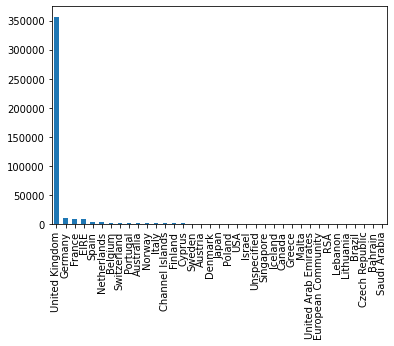

In [19]:
retail.Country.value_counts().plot(kind= 'bar')

In [20]:
retail.InvoiceNo.nunique() # this shows the total no. of unique transactions for the given period.

22190

In [21]:
len(retail.InvoiceNo.value_counts())# this shows the total no. of unique transactions for the given period.

22190

In [22]:
len(retail.Description.unique()),retail.Description.nunique() # This shows the no. of distinct products bought by the customer during the given period.

(3896, 3896)

<AxesSubplot:xlabel='UnitPrice'>

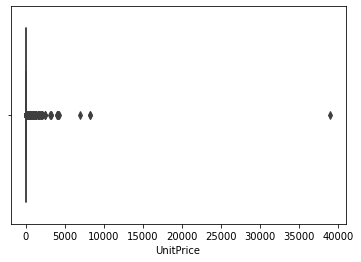

In [23]:
sns.boxplot(retail.UnitPrice)

In [24]:
retail.UnitPrice.quantile([0,.25,.50,.75,.8,.9,.99,1])#This shows the relative prices of products where price of maximum products lie below 15 sterling
                                                      #per unit, with max price being 38970.

0.00        0.00
0.25        1.25
0.50        1.95
0.75        3.75
0.80        4.15
0.90        6.75
0.99       15.00
1.00    38970.00
Name: UnitPrice, dtype: float64

<AxesSubplot:ylabel='Frequency'>

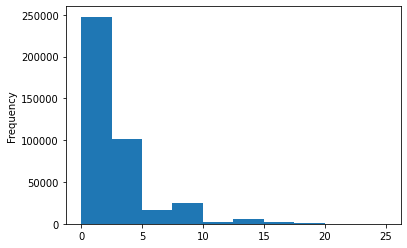

In [25]:
retail.UnitPrice[retail.UnitPrice<25].plot(kind='hist')

In [26]:
retail.Description.mode() #Highest selling product.

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [27]:
retail.Description.value_counts().head(25) # This is a list of top 25 selling products.

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
PAPER CHAIN KIT 50'S CHRISTMAS        1013
LUNCH BAG SPACEBOY DESIGN             1006
LUNCH BAG CARS BLUE                   1000
HEART OF WICKER SMALL                  990
NATURAL SLATE HEART CHALKBOARD         989
JAM MAKING SET WITH JARS               966
LUNCH BAG PINK POLKADOT                961
LUNCH BAG SUKI DESIGN                  932
ALARM CLOCK BAKELIKE RED               917
WOODEN PICTURE FRAME WHITE FINISH      900
REX CASH+CARRY JUMBO SHOPPER           900
JUMBO BAG PINK POLKADOT                897
LUNCH BAG A

<a id="1"></a> <br>
## Cohort analysis :

#### As per requirement we will build a cohort on the basis of the 1st invoice date of available data in a month and then check for retention metric. Cohort size will be 1 month and we will consider the whole data as range under analysis. 

In [28]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [29]:
#Converting Customer ID to object datatype.
retail1=retail.copy()
retail1['CustomerID']=retail1['CustomerID'].astype(str)
retail1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [30]:
# for this analysis we are going to drop negative Quantity orders if not done so it would be calculated in ordered more than once.
retail1.drop(retail1[retail1.Quantity<1].index, inplace = True)
retail1[retail1.Quantity<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [31]:
n_orders = retail1.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / retail1['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

65.57% of customers ordered more than once.


In [32]:
# This show that 65% out of all data provided to us in this given period ordered more than once.

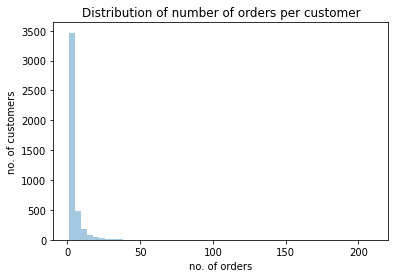

In [33]:
# We can have a look at the distribution of the number of orders per customer.
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='no. of orders', 
       ylabel='no. of customers');

#### We keep only the relevant columns and drop duplicated values — one order (indicated by InvoiceNo) can contain multiple items (indicated by StockCode) for analysis

In [34]:
retail1 = retail1[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()
retail1

,CustomerID,InvoiceNo,InvoiceDate
0,17850.0,536365,2010-12-01 08:26:00
7,17850.0,536366,2010-12-01 08:28:00
9,13047.0,536367,2010-12-01 08:34:00
21,13047.0,536368,2010-12-01 08:34:00
25,13047.0,536369,2010-12-01 08:35:00
...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00
541867,13777.0,581584,2011-12-09 12:25:00
541869,15804.0,581585,2011-12-09 12:31:00
541890,13113.0,581586,2011-12-09 12:49:00


#### Creating the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date (calculated per customer).The latter one is the truncated month of the purchase date.

In [35]:
retail1['order_month'] = retail1['InvoiceDate'].dt.to_period('M')
retail1['cohort'] = retail1.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [36]:
retail1.head(25)

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,17850.0,536365,2010-12-01 08:26:00,2010-12,2010-12
7,17850.0,536366,2010-12-01 08:28:00,2010-12,2010-12
9,13047.0,536367,2010-12-01 08:34:00,2010-12,2010-12
21,13047.0,536368,2010-12-01 08:34:00,2010-12,2010-12
25,13047.0,536369,2010-12-01 08:35:00,2010-12,2010-12
26,12583.0,536370,2010-12-01 08:45:00,2010-12,2010-12
46,13748.0,536371,2010-12-01 09:00:00,2010-12,2010-12
47,17850.0,536372,2010-12-01 09:01:00,2010-12,2010-12
49,17850.0,536373,2010-12-01 09:02:00,2010-12,2010-12
65,15100.0,536374,2010-12-01 09:09:00,2010-12,2010-12


#### Aggregating the data per cohort and order_month and count the number of unique customers in each group. Additionally, we add the period_number, which indicates the number of periods between the cohort month and the month of the purchase.

In [37]:
df_cohort = retail1.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
from operator import attrgetter
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [38]:
df_cohort.head(14)

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4
5,2010-12,2011-05,352,5
6,2010-12,2011-06,321,6
7,2010-12,2011-07,309,7
8,2010-12,2011-08,313,8
9,2010-12,2011-09,350,9


#### Now we will pivot the df_cohort table in a way that each row contains information about a given cohort and each column contains values for certain period.

In [39]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

#### To obtain the retention matrix, we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.

In [40]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

####  We plot the retention matrix as a heatmap. Additionally, we wanted to include extra information regarding the cohort size. That is why we in fact created two heatmaps, where the one indicating the cohort size is using a white only colormap — no coloring at all.

In [41]:
import matplotlib.colors as mcolors

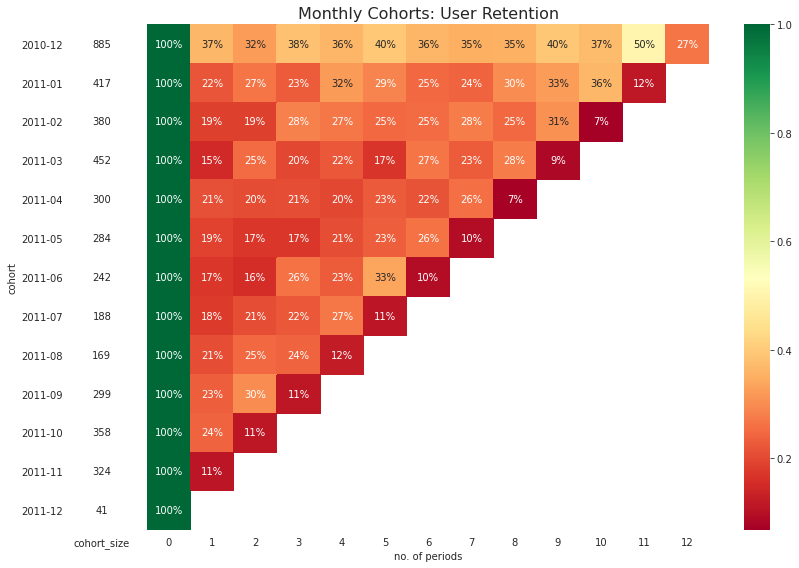

In [42]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='no. of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

#### After going through the heatmap it can be inferred that the Cohort in 2010-12 had maximum retention with 27% for the 12th period and an average of around 34% throughout the year.
#### Whereas there is sharp decrease in retention rate for the 2nd group at the end period, average retention rate is around 26% throughout the period. Horizontally it shows gradual increase except for final sharp decline.
#### All in all we can say- the cohort in proceeding months are observed to show a gradual decline in retention rate. But the average retention rate for the end period for all cohort is seen to be around 10%, except for the 1st cohort.

<a id="3"></a> <br>
## Data Preparation for RFM analysis.

#### We are going to analyse the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of transactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [43]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.shape
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [44]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [45]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [46]:
# New Attribute : Recency

# Convert 'InvoiceDate' to  datetime  datatype.

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [47]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Amount       401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [48]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [49]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [50]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [51]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [52]:
# Merging tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [53]:
x=[]
for i in rfm.Amount:
    if i<=rfm.Amount.quantile(.25):
        x.append(1)
    elif i<=rfm.Amount.quantile(0.50):
        x.append(2)
    elif i<=rfm.Amount.quantile(0.75):
        x.append(3)
    elif i<=rfm.Amount.quantile(1.0):
        x.append(4)
    

In [54]:
rfm["Amount_star"]=x
rfm

,CustomerID,Amount,Frequency,Recency,Amount_star
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,4
2,12348.0,1797.24,31,74,4
3,12349.0,1757.55,73,18,4
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
4367,18280.0,180.60,10,277,1
4368,18281.0,80.82,7,180,1
4369,18282.0,176.60,13,7,1
4370,18283.0,2045.53,721,3,4


In [55]:
y=[]
for i in rfm.Frequency:
    if i<=rfm.Frequency.quantile(.25):
        y.append(1)
    elif i<=rfm.Frequency.quantile(0.50):
        y.append(2)
    elif i<=rfm.Frequency.quantile(0.75):
        y.append(3)
    elif i<=rfm.Frequency.quantile(1.0):
        y.append(4)

In [56]:
rfm["Frequency_star"]=y
rfm

,CustomerID,Amount,Frequency,Recency,Amount_star,Frequency_star
0,12346.0,0.00,2,325,1,1
1,12347.0,4310.00,182,1,4,4
2,12348.0,1797.24,31,74,4,2
3,12349.0,1757.55,73,18,4,3
4,12350.0,334.40,17,309,2,1
...,...,...,...,...,...,...
4367,18280.0,180.60,10,277,1,1
4368,18281.0,80.82,7,180,1,1
4369,18282.0,176.60,13,7,1,1
4370,18283.0,2045.53,721,3,4,4


In [57]:
z=[]
for i in rfm.Recency:
    if i<=rfm.Recency.quantile(.25):
        z.append(4)
    elif i<=rfm.Recency.quantile(0.50):
        z.append(3)
    elif i<=rfm.Recency.quantile(0.75):
        z.append(2)
    elif i<=rfm.Recency.quantile(1.0):
        z.append(1)

In [58]:
rfm['Recency_star']=z
rfm

,CustomerID,Amount,Frequency,Recency,Amount_star,Frequency_star,Recency_star
0,12346.0,0.00,2,325,1,1,1
1,12347.0,4310.00,182,1,4,4,4
2,12348.0,1797.24,31,74,4,2,2
3,12349.0,1757.55,73,18,4,3,3
4,12350.0,334.40,17,309,2,1,1
...,...,...,...,...,...,...,...
4367,18280.0,180.60,10,277,1,1,1
4368,18281.0,80.82,7,180,1,1,1
4369,18282.0,176.60,13,7,1,1,4
4370,18283.0,2045.53,721,3,4,4,4


In [59]:
rfm['rfm_score']=rfm.Amount_star+rfm.Frequency_star+rfm.Recency_star
rfm

,CustomerID,Amount,Frequency,Recency,Amount_star,Frequency_star,Recency_star,rfm_score
0,12346.0,0.00,2,325,1,1,1,3
1,12347.0,4310.00,182,1,4,4,4,12
2,12348.0,1797.24,31,74,4,2,2,8
3,12349.0,1757.55,73,18,4,3,3,10
4,12350.0,334.40,17,309,2,1,1,4
...,...,...,...,...,...,...,...,...
4367,18280.0,180.60,10,277,1,1,1,3
4368,18281.0,80.82,7,180,1,1,1,3
4369,18282.0,176.60,13,7,1,1,4,6
4370,18283.0,2045.53,721,3,4,4,4,12


In [60]:
rfm['rfm_score%']=round(((rfm.rfm_score/12)*100),2) #this I have created to have better clarity while analysing.
rfm

,CustomerID,Amount,Frequency,Recency,Amount_star,Frequency_star,Recency_star,rfm_score,rfm_score%
0,12346.0,0.00,2,325,1,1,1,3,25.00
1,12347.0,4310.00,182,1,4,4,4,12,100.00
2,12348.0,1797.24,31,74,4,2,2,8,66.67
3,12349.0,1757.55,73,18,4,3,3,10,83.33
4,12350.0,334.40,17,309,2,1,1,4,33.33
...,...,...,...,...,...,...,...,...,...
4367,18280.0,180.60,10,277,1,1,1,3,25.00
4368,18281.0,80.82,7,180,1,1,1,3,25.00
4369,18282.0,176.60,13,7,1,1,4,6,50.00
4370,18283.0,2045.53,721,3,4,4,4,12,100.00


In [61]:
rfm['rfm_segment']=rfm.Amount_star.astype(str) + "-" + rfm.Frequency_star.astype(str) +  "-" + rfm.Recency_star.astype(str)
rfm

,CustomerID,Amount,Frequency,Recency,Amount_star,Frequency_star,Recency_star,rfm_score,rfm_score%,rfm_segment
0,12346.0,0.00,2,325,1,1,1,3,25.00,1-1-1
1,12347.0,4310.00,182,1,4,4,4,12,100.00,4-4-4
2,12348.0,1797.24,31,74,4,2,2,8,66.67,4-2-2
3,12349.0,1757.55,73,18,4,3,3,10,83.33,4-3-3
4,12350.0,334.40,17,309,2,1,1,4,33.33,2-1-1
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,180.60,10,277,1,1,1,3,25.00,1-1-1
4368,18281.0,80.82,7,180,1,1,1,3,25.00,1-1-1
4369,18282.0,176.60,13,7,1,1,4,6,50.00,1-1-4
4370,18283.0,2045.53,721,3,4,4,4,12,100.00,4-4-4


In [62]:
rfm['rfm_segment1']=rfm.Amount_star.astype(str) + rfm.Frequency_star.astype(str) + rfm.Recency_star.astype(str)
rfm

,CustomerID,Amount,Frequency,Recency,Amount_star,Frequency_star,Recency_star,rfm_score,rfm_score%,rfm_segment,rfm_segment1
0,12346.0,0.00,2,325,1,1,1,3,25.00,1-1-1,111
1,12347.0,4310.00,182,1,4,4,4,12,100.00,4-4-4,444
2,12348.0,1797.24,31,74,4,2,2,8,66.67,4-2-2,422
3,12349.0,1757.55,73,18,4,3,3,10,83.33,4-3-3,433
4,12350.0,334.40,17,309,2,1,1,4,33.33,2-1-1,211
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,180.60,10,277,1,1,1,3,25.00,1-1-1,111
4368,18281.0,80.82,7,180,1,1,1,3,25.00,1-1-1,111
4369,18282.0,176.60,13,7,1,1,4,6,50.00,1-1-4,114
4370,18283.0,2045.53,721,3,4,4,4,12,100.00,4-4-4,444


In [63]:
rfm.rfm_segment.value_counts().head(60) # this shows all the unique combination of star ratings.

4-4-4    470
1-1-1    393
4-4-3    210
2-2-1    204
1-1-2    181
3-3-3    176
2-2-2    168
3-3-2    164
3-3-4    158
1-1-3    125
2-2-3    121
1-2-1    106
4-4-2    105
2-1-1    103
3-4-3     93
3-2-2     92
3-4-4     85
2-1-2     80
4-3-4     79
2-2-4     76
2-3-3     73
1-1-4     68
3-3-1     65
2-3-2     57
4-3-3     57
2-3-1     56
1-2-3     54
4-3-2     52
3-2-3     52
1-2-2     52
2-3-4     49
3-2-4     43
2-1-3     36
3-4-2     35
1-3-1     33
3-2-1     33
3-1-2     27
3-4-1     24
1-3-3     23
1-2-4     22
2-1-4     22
4-4-1     21
3-1-1     21
2-4-3     20
1-3-2     20
4-2-2     19
4-2-4     16
4-1-2     14
1-3-4     14
4-3-1     13
4-2-3     13
2-4-4     13
3-1-3     13
3-1-4     12
2-4-2     12
4-1-3      8
4-1-1      7
4-2-1      6
4-1-4      3
2-4-1      3
Name: rfm_segment, dtype: int64

In [64]:
#((rfm.Amount_star== 4).sum()/retail.CustomerID.nunique())*100

#### Inferences from RFM segmentation:
->From above rfm_segment we can easily filter and make inferences that any value starting with 4 or 3 (or say at hundreds place) will be a high revenue generating customer, thus they should be made to feel valued customer.


->Any customer with rfm_score% of 75 or higher can be considered a high value customer even if they have not made more purchases because they can be approached to gain insight as to what offer lures them to buy more, and thus creating proper strategy to target those group to give offers or discounts.


-> Best Customers – This group consists of those customers who are found in M-4, F-4, and R-4  meaning that they transacted recently, do so often and spend more than other customers. A shortened notation for this segment is 4-4-4;


->High-spending New Customers – This group consists of those customers in 4-1-1 and 4-2-1. These are customers who transacted only once, but very recently and they spent a lot.


->Lowest-Spending Active Loyal Customers – This group consists of those customers in segments 1-1-3 and 1-1-4 (they transacted recently and do so often, but spend the least).


->Churned Best Customers – This segment consists of those customers in groups 4-1-1, 4-1-2, 4-2-1 and 4-2-2 (they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted)


->Best Customers – Communications with this group should make them feel valued and appreciated. These customers likely generate a disproportionately high percentage of overall revenues and thus focusing on keeping them happy should be a top priority. Further analyzing their individual preferences and affinities will provide additional information.


->High-spending New Customers – It is always a good idea to carefully incubate all new customers, but because these new customers spent a lot on their first purchase, it’s even more important. Like with the Best Customers group, it’s important to make them feel valued and appreciated – and to give them terrific incentives to continue interacting with the client.


->Lowest-Spending Active Loyal Customers – These repeat customers are active and loyal, but they are low spenders. Marketers should create campaigns for this group that make them feel valued, and incentivize them to increase their spend levels. As loyal customers, it often also pays to reward them with special offers if they spread the word about the brand to their friends, e.g., via social networks.


->Churned Best Customers – These are valuable customers who stopped transacting a long time ago. While it’s often challenging to re-engage churned customers, the high value of these customers makes it worthwhile trying. Like with the Best Customers group, it’s important to communicate with them on the basis of their specific preferences, as known from earlier transaction data.

<a id="2"></a> <br>
## Data Preparation for Algorithm.

#### There are 2 types of outliers and we will treat outliers as it can skew our dataset.
- Statistical
- Domain specific

Text(0.5, 0, 'Attributes')

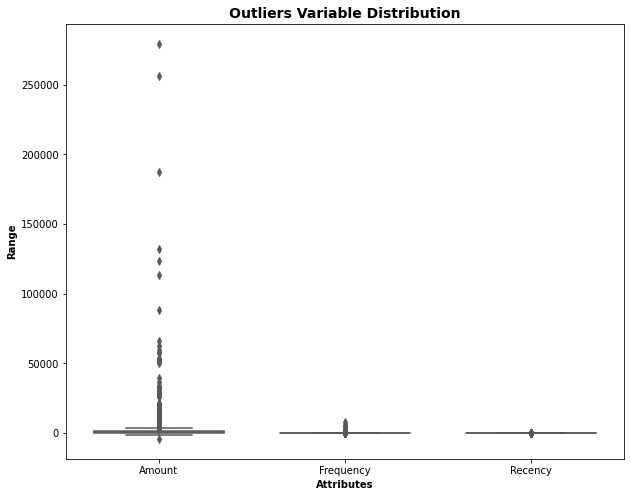

In [65]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [66]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

<a id="2"></a> <br>
### Standardizing the data.

It is extremely important to rescale the variables so that they have a comparable scale.|
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [67]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4295, 3)

In [68]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.722542,-0.750830,2.302166
1,1.735232,1.057112,-0.906150
2,0.302333,-0.459551,-0.183289
3,0.279700,-0.037698,-0.737813
4,-0.531850,-0.600168,2.143731


<a id="1"></a> <br>
## Building the Model

### K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.<br>

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [69]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)
rfm_df_scaled

,Amount,Frequency,Recency
0,-0.722542,-0.750830,2.302166
1,1.735232,1.057112,-0.906150
2,0.302333,-0.459551,-0.183289
3,0.279700,-0.037698,-0.737813
4,-0.531850,-0.600168,2.143731
...,...,...,...
4290,-0.619555,-0.670477,1.826860
4291,-0.676454,-0.700610,0.866345
4292,-0.621836,-0.640345,-0.846737
4293,0.443920,6.470894,-0.886346


In [70]:
kmeans.labels_

array([1, 2, 0, ..., 0, 2, 0], dtype=int32)

### Deciding the optimum number of clusters to be formed.

#### Using Elbow Curve to get the right number of Clusters.
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

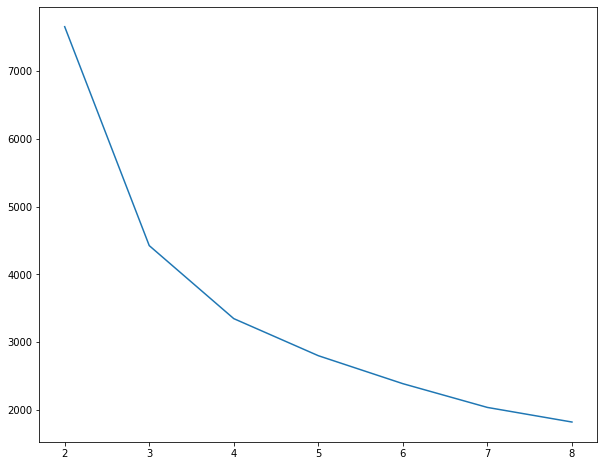

In [71]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd)

#### Exporting dataframe to excel for data visualization in Tableau

In [72]:
import openpyxl
import xlsxwriter

In [73]:
error_cluster= pd.DataFrame(list(zip(range_n_clusters,ssd)), columns=["no.of clusters","Error"])
error_cluster.to_excel("error_cluster.xlsx")

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [74]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.543842560086245
For n_clusters=3, the silhouette score is 0.5096914125042423
For n_clusters=4, the silhouette score is 0.48234533133685875
For n_clusters=5, the silhouette score is 0.4689733294739241
For n_clusters=6, the silhouette score is 0.4191114956793311
For n_clusters=7, the silhouette score is 0.41741048653303253
For n_clusters=8, the silhouette score is 0.4156303311758245


In [75]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
 kmeans.labels_

array([2, 0, 1, ..., 1, 0, 1], dtype=int32)

In [77]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head(60)

,CustomerID,Amount,Frequency,Recency,Amount_star,Frequency_star,Recency_star,rfm_score,rfm_score%,rfm_segment,rfm_segment1,Cluster_Id
0,12346.0,0.00,2,325,1,1,1,3,25.00,1-1-1,111,2
1,12347.0,4310.00,182,1,4,4,4,12,100.00,4-4-4,444,0
2,12348.0,1797.24,31,74,4,2,2,8,66.67,4-2-2,422,1
3,12349.0,1757.55,73,18,4,3,3,10,83.33,4-3-3,433,1
4,12350.0,334.40,17,309,2,1,1,4,33.33,2-1-1,211,2
5,12352.0,1545.41,95,35,3,3,3,9,75.00,3-3-3,333,1
6,12353.0,89.00,4,203,1,1,1,3,25.00,1-1-1,111,2
7,12354.0,1079.40,58,231,3,3,1,7,58.33,3-3-1,331,2
8,12355.0,459.40,13,213,2,1,1,4,33.33,2-1-1,211,2
9,12356.0,2811.43,59,22,4,3,3,10,83.33,4-3-3,433,1


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

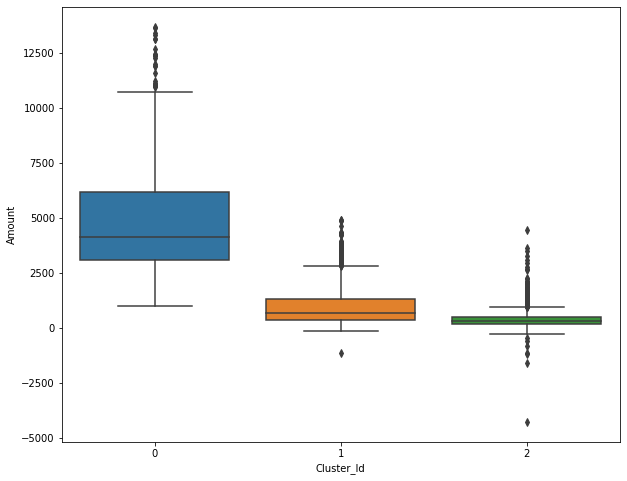

In [78]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

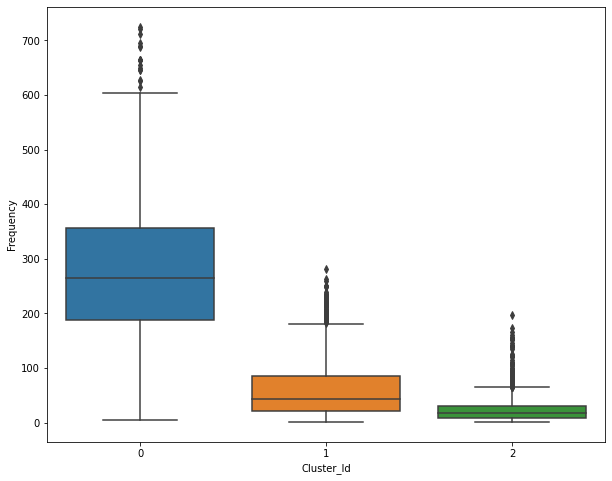

In [79]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

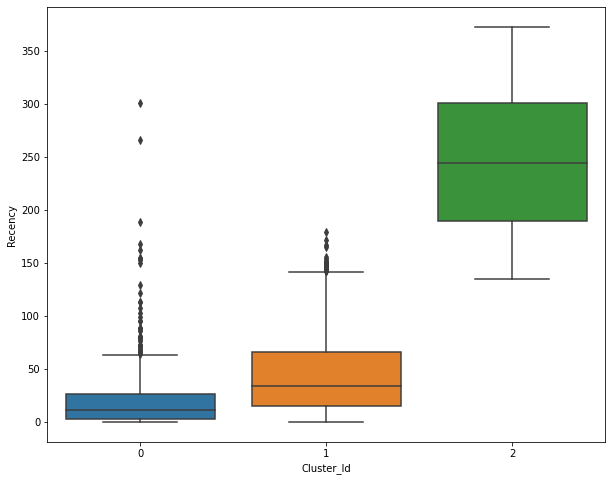

In [80]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

<a id="5"></a> <br>
# Final Analysis

## Inferences:
K-Means Clustering with 3 Cluster Ids
- Customers with Cluster Id 1 are frequent buyers, recent buyers and high spender as well, should be considered as the  best customer group.
- Customers with Cluster Id 0 are the customers with comparatively good monetary value, frequency and receny for all transactions under observation. Thus these customer group can be a target for conversion into high spending cohort.
- Customers with Cluster Id 2 are not recent buyers, frequency is also low and hence least of importance from business point of view.

In [81]:
rfm

,CustomerID,Amount,Frequency,Recency,Amount_star,Frequency_star,Recency_star,rfm_score,rfm_score%,rfm_segment,rfm_segment1,Cluster_Id
0,12346.0,0.00,2,325,1,1,1,3,25.00,1-1-1,111,2
1,12347.0,4310.00,182,1,4,4,4,12,100.00,4-4-4,444,0
2,12348.0,1797.24,31,74,4,2,2,8,66.67,4-2-2,422,1
3,12349.0,1757.55,73,18,4,3,3,10,83.33,4-3-3,433,1
4,12350.0,334.40,17,309,2,1,1,4,33.33,2-1-1,211,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,180.60,10,277,1,1,1,3,25.00,1-1-1,111,2
4368,18281.0,80.82,7,180,1,1,1,3,25.00,1-1-1,111,2
4369,18282.0,176.60,13,7,1,1,4,6,50.00,1-1-4,114,1
4370,18283.0,2045.53,721,3,4,4,4,12,100.00,4-4-4,444,0


#### Exporting files from dataframe to excel for visualization and dashboard building in Tableau.

In [82]:
import openpyxl
import xlsxwriter

In [83]:
rfm.to_excel("rfm.xlsx")

<a id="5"></a> <br>
#### Submitted by: RAHUL RANJAN
#### Email: rahulranjantechie@gamil.com